In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from maystats import *

In [7]:
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])
ell, ps_mean = get_real_list( 'PS', noisy='K', redshift='10',  
                               bin_min=300, bin_max=6000, smoothing='1.00', binscale='log' )
get_PS = build_GP( params, ell, ps_mean )

/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-8.21551948e-05,  2.70250714e-04]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 57, 'nit': 13, 'warnflag': 2}
  " state: %s" % convergence_dict)


In [8]:
params.T[0]

array([0. , 0.3, 2.1])

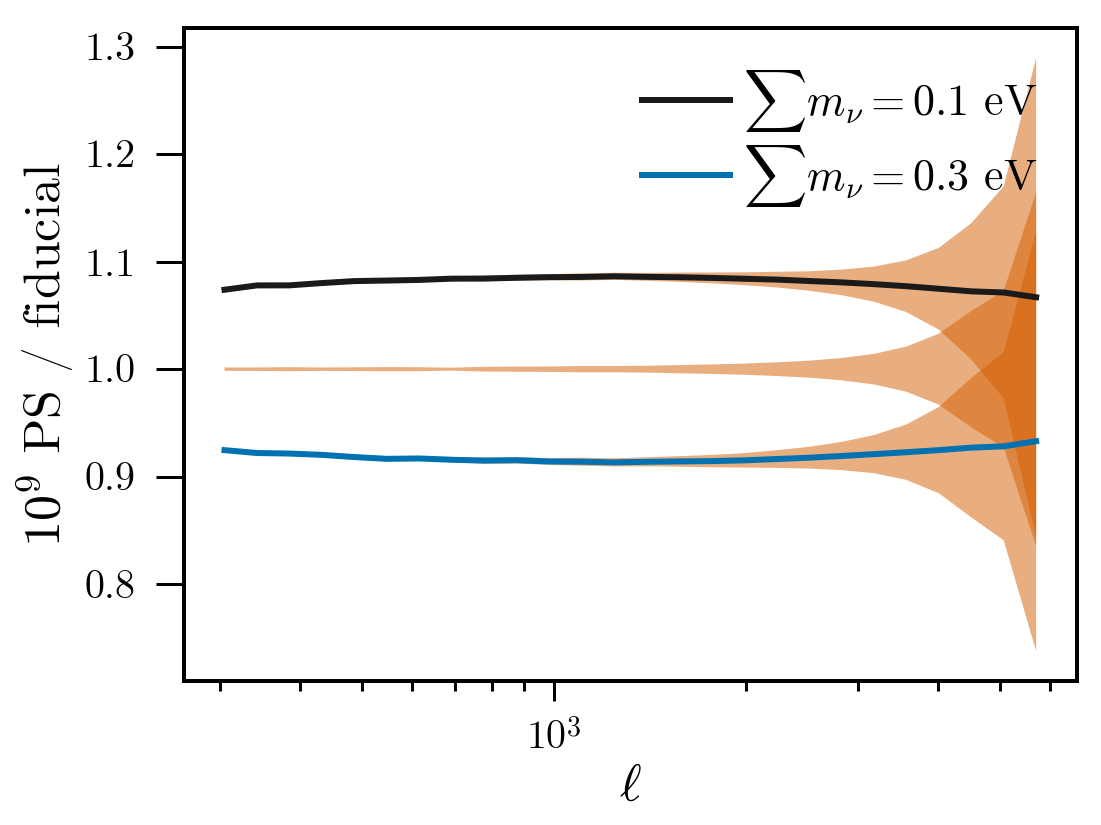

In [9]:
ys0, sigs = get_PS( [0.2, 0.3, 2.1] )
plt.fill(np.concatenate([ell, ell[::-1]]),
         np.concatenate([ 1 + 1.9600 * sigs / ys0 ,
                        ( 1 - 1.9600 * sigs / ys0)[::-1]]),
         alpha=.5, fc=default_color_list[3], ec='None')
# plt.plot( ell, ys0, label=r'$\sum m_{\nu} = 0.1$ eV' )

ys, sigs = get_PS( [0.1, 0.3, 2.1] )
plt.fill(np.concatenate([ell, ell[::-1]]),
         np.concatenate([ (ys- 1.9600 * sigs)/ys0 ,
                        ( (ys+1.9600 * sigs)/ys0)[::-1]]),
         alpha=.5, fc=default_color_list[3], ec='None')
plt.plot( ell, ys/ys0, label=r'$\sum m_{\nu} = 0.1$ eV' )

ys, sigs = get_PS( [0.3, 0.3, 2.1] )
plt.fill(np.concatenate([ell, ell[::-1]]),
         np.concatenate([ (ys- 1.9600 * sigs)/ys0 ,
                        ( (ys+1.9600 * sigs)/ys0)[::-1]]),
         alpha=.5, fc=default_color_list[3], ec='None')
plt.plot( ell, ys/ys0, label=r'$\sum m_{\nu} = 0.3$ eV' )

# plt.yscale('log')
plt.xscale('log')
plt.ylabel('$10^9$ PS / fiducial')
plt.xlabel('$\ell$')
plt.legend()

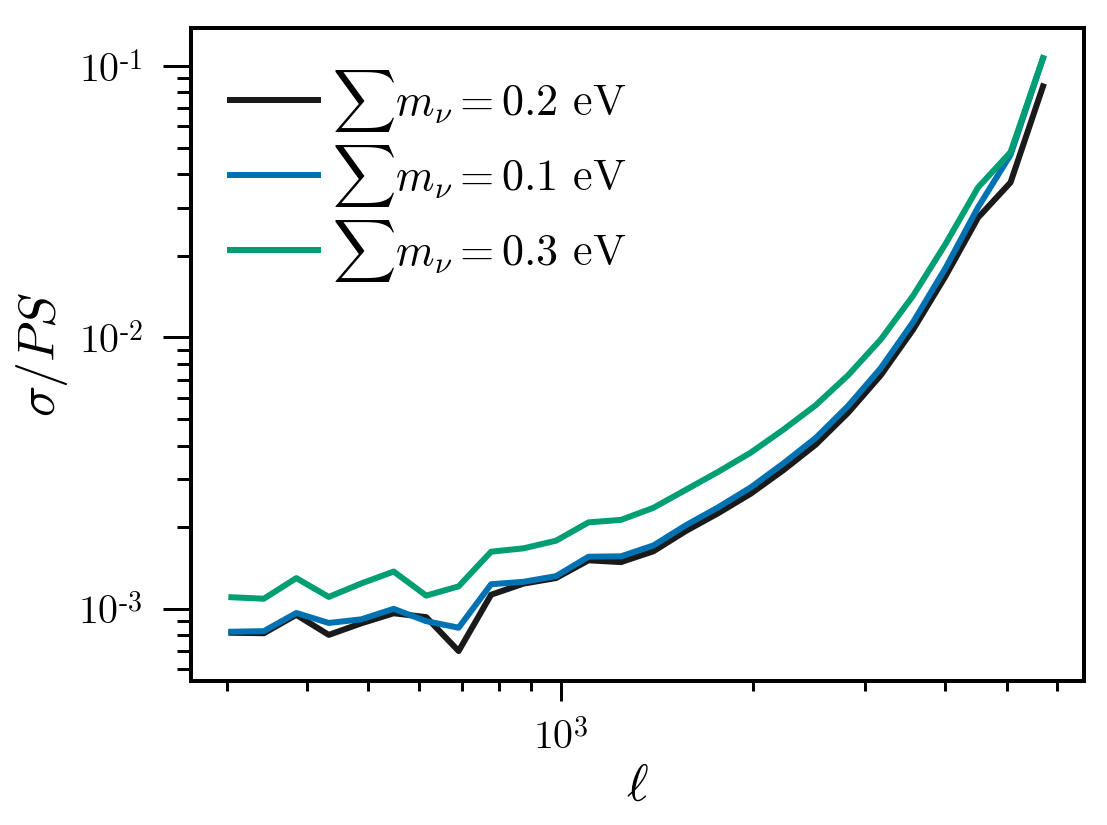

In [10]:
ys, sigs = get_PS( [0.2, 0.3, 2.1] )
# plt.fill(np.concatenate([ell, ell[::-1]]),
#          np.concatenate([ 1 + 1.9600 * sigs / ys0 ,
#                         ( 1 - 1.9600 * sigs / ys0)[::-1]]),
#          alpha=.5, fc=default_color_list[3], ec='None')
plt.plot( ell, sigs/ys, label=r'$\sum m_{\nu} = 0.2$ eV' )

ys, sigs = get_PS( [0.1, 0.3, 2.1] )
# plt.fill(np.concatenate([ell, ell[::-1]]),
#          np.concatenate([ (ys- 1.9600 * sigs)/ys0 ,
#                         ( (ys+1.9600 * sigs)/ys0)[::-1]]),
#          alpha=.5, fc=default_color_list[3], ec='None')
plt.plot( ell, sigs/ys, label=r'$\sum m_{\nu} = 0.1$ eV' )

ys, sigs = get_PS( [0.3, 0.3, 2.1] )
# plt.fill(np.concatenate([ell, ell[::-1]]),
#          np.concatenate([ (ys- 1.9600 * sigs)/ys0 ,
#                         ( (ys+1.9600 * sigs)/ys0)[::-1]]),
#          alpha=.5, fc=default_color_list[3], ec='None')
plt.plot( ell, sigs/ys, label=r'$\sum m_{\nu} = 0.3$ eV' )

plt.yscale('log')
plt.xscale('log')
plt.ylabel('$\sigma / PS$')
plt.xlabel('$\ell$')
plt.legend()